## Importing Necessary Libraries

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

## Loading Data

In [193]:
df = pd.read_csv('iris.data', names=['sepal_length','sepal_width','petal_length','petal_width','class'])

In [194]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Data Preprocessing

In [195]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

No missing values

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [197]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [198]:
species = []
for classs in df['class']:
    species.append(classs.split('-')[-1])
df['species']=species

In [199]:
df.drop('class',axis=1, inplace=True)

In [200]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Exploratory Data Analysis

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-

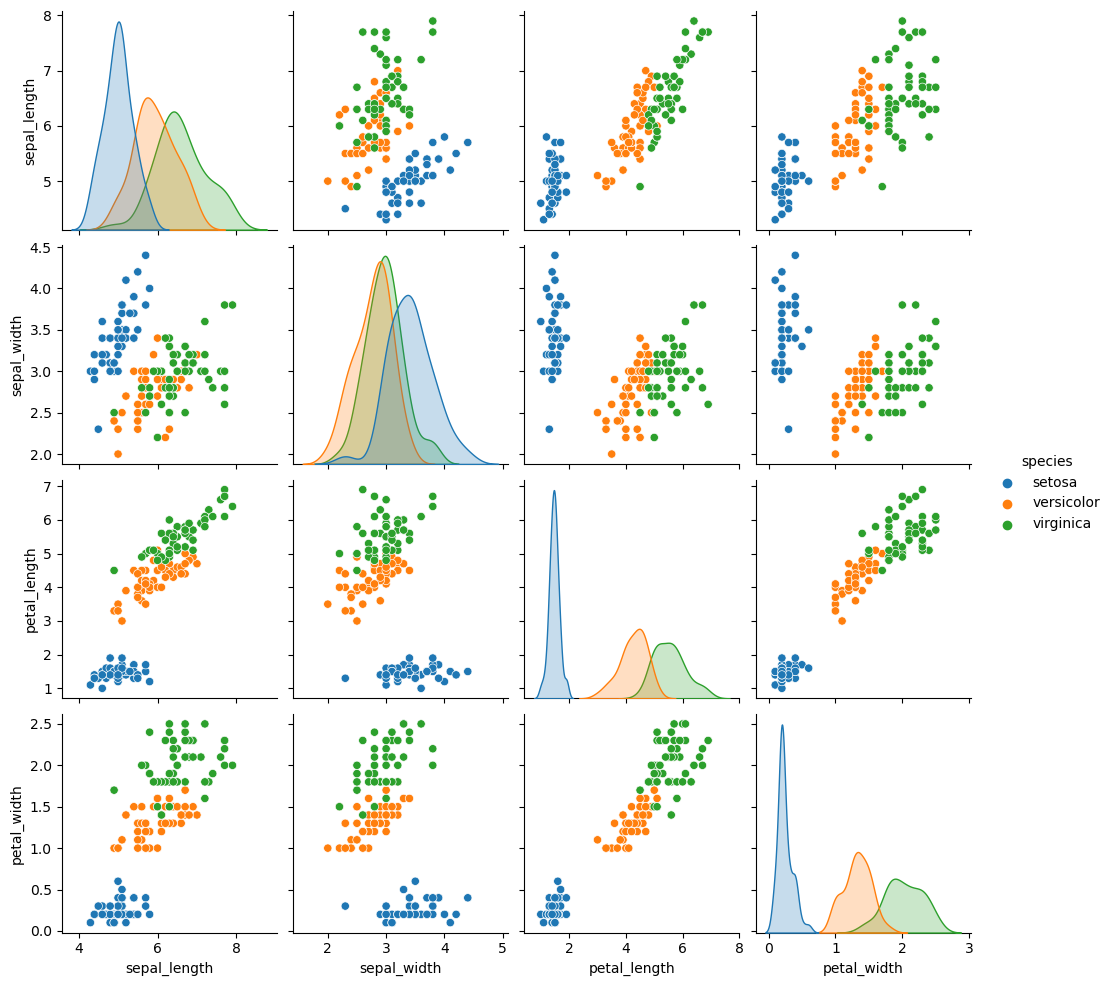

In [201]:
sns.pairplot(df, hue='species', diag_kind="kde")

Observation :
- setosa data points are clearly differential 
- versicolor and virginica have some data overlap so not easily separable 

In [202]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


<Axes: >

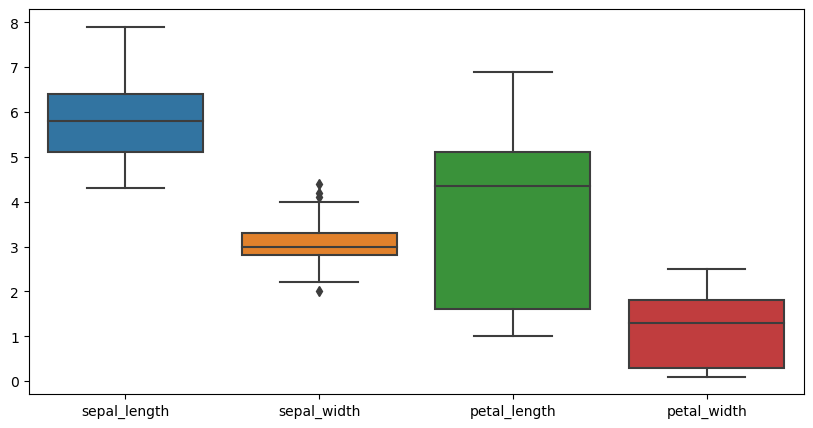

In [203]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)

<Axes: xlabel='species', ylabel='sepal_length'>

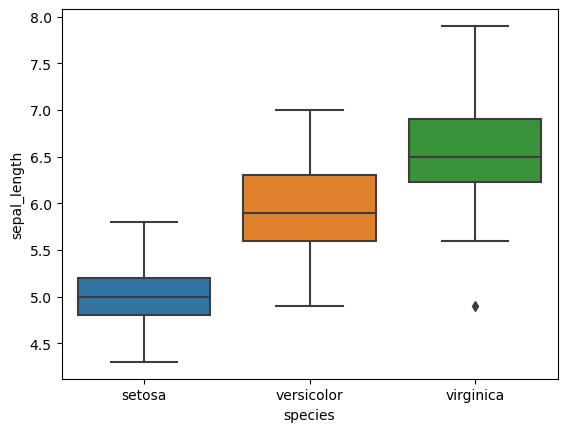

In [204]:
sns.boxplot(df,x='species', y='sepal_length')

<Axes: xlabel='species', ylabel='sepal_width'>

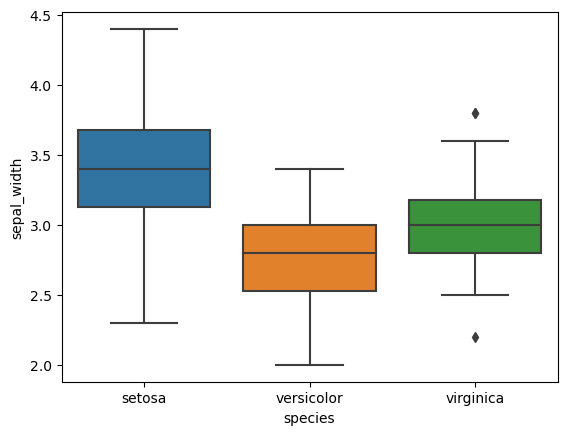

In [205]:
sns.boxplot(df,x='species', y='sepal_width')

<Axes: xlabel='species', ylabel='petal_length'>

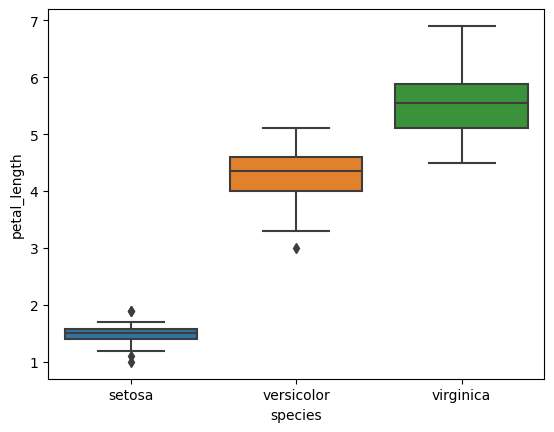

In [206]:
sns.boxplot(df,x='species', y='petal_length')

<Axes: xlabel='species', ylabel='petal_width'>

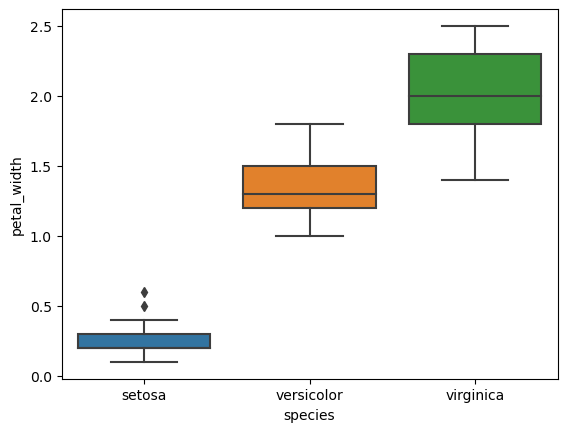

In [207]:
sns.boxplot(df,x='species', y='petal_width')

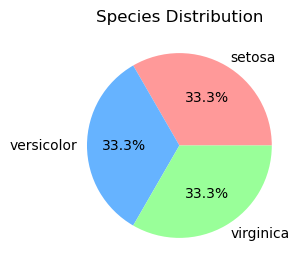

In [208]:
df['species'].value_counts().plot(kind='pie', 
                                  autopct='%1.1f%%',        
                                  colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
                                  figsize=(3, 3),            
                                  title='Species Distribution')  

# Display the plot
plt.ylabel('')  # Hide the y-axis label
plt.show()

Observation:
- all the classes have same number of samples 
- uniform distribution among the species

In [209]:
species_marked = {'setosa':1,'versicolor':2,'virginica':3}

In [210]:
df1=df.copy()
df1['species'] = df1['species'].map(species_marked)
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


<Axes: >

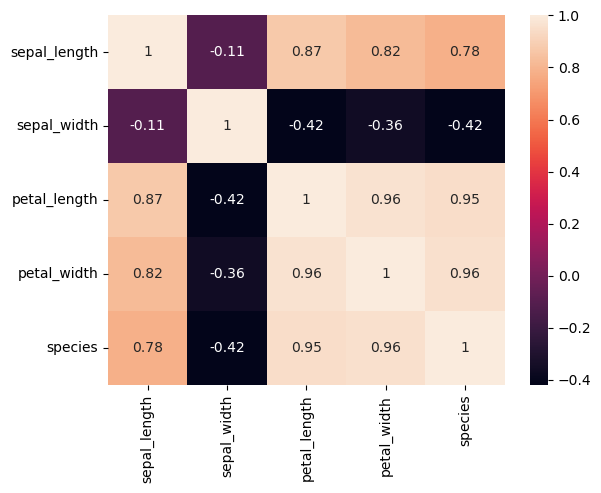

In [211]:
sns.heatmap(df1.corr(), annot=True)

Observation:
- almost all the features are highly correlated

## Data Modeling

In [212]:
X=df1.drop('species', axis=1)
y=df1['species']

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#### Logistic Regression 

In [214]:
lgr=LogisticRegression(solver='saga')

In [215]:
lgr.fit(X_train, y_train)

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [216]:
y_pred_lgr = lgr.predict(X_test)
y_pred_lgr

array([1, 1, 3, 2, 2, 2, 2, 3, 2, 1, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 3, 3, 1, 3], dtype=int64)

In [217]:
accuracy_score(y_test, y_pred_lgr)

0.9333333333333333

In [218]:
print(classification_report(y_test, y_pred_lgr))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      0.85      0.92        13
           3       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.94      0.93      0.93        30



#### KNearest Neighbors

In [219]:
knn=KNeighborsClassifier()

In [220]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [221]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 1, 3, 2, 2, 2, 2, 3, 2, 1, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 3, 3, 1, 3], dtype=int64)

In [222]:
accuracy_score(y_test, y_pred_knn)

0.9

In [223]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      0.77      0.87        13
           3       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.92      0.92      0.91        30
weighted avg       0.92      0.90      0.90        30



In [224]:
rf=RandomForestClassifier()

In [225]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [226]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 1, 3, 2, 2, 2, 2, 3, 2, 1, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 1,
       3, 1, 1, 3, 3, 3, 1, 3], dtype=int64)

In [227]:
accuracy_score(y_test, y_pred_rf)

0.9

In [228]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      0.77      0.87        13
           3       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.92      0.92      0.91        30
weighted avg       0.92      0.90      0.90        30



In [229]:
dt=DecisionTreeClassifier()

In [230]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [231]:
y_pred_dt=dt.predict(X_test)
y_pred_dt

array([1, 1, 3, 2, 2, 2, 2, 3, 2, 1, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 1,
       3, 1, 1, 3, 3, 3, 1, 3], dtype=int64)

In [232]:
accuracy_score(y_test, y_pred_dt)

0.9

In [233]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      0.77      0.87        13
           3       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.92      0.92      0.91        30
weighted avg       0.92      0.90      0.90        30



## Results

In [234]:
f1_scores = []
y_pred = [y_pred_lgr, y_pred_knn, y_pred_rf, y_pred_dt]
for pred in y_pred:
    f1_scores.append(f1_score(y_test,pred, average=None))

In [235]:
f1_scores

[array([1.        , 0.91666667, 0.90909091]),
 array([1.        , 0.86956522, 0.86956522]),
 array([1.        , 0.86956522, 0.86956522]),
 array([1.        , 0.86956522, 0.86956522])]

In [236]:
accuracy_scores = []
y_pred = [y_pred_lgr, y_pred_knn, y_pred_rf, y_pred_dt]
for pred in y_pred:
    accuracy_scores.append(accuracy_score(y_test,pred))

In [237]:
accuracy_scores

[0.9333333333333333, 0.9, 0.9, 0.9]

In [238]:
models = ['Logistic Regression', 'KNearest Neighbors', 'Random Forest', 'Decision Tree']

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


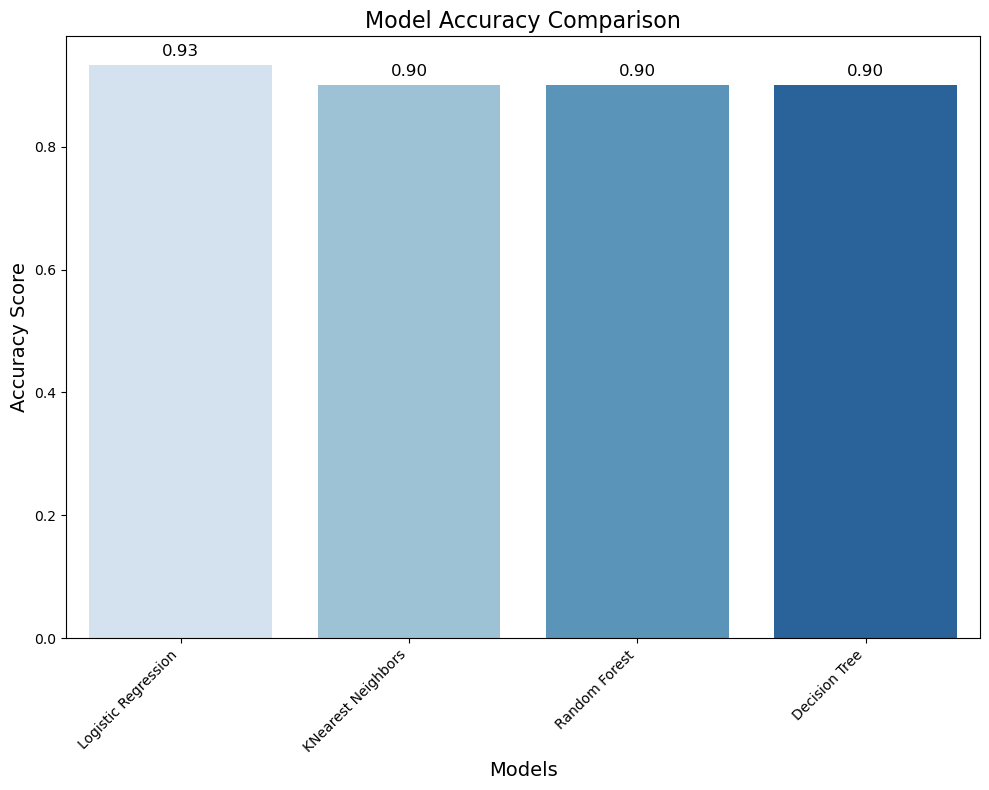

In [239]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=models, y=accuracy_scores, palette='Blues')

# Add value annotations on top of each bar
for i, score in enumerate(accuracy_scores):
    ax.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Set the title and axis labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)

# Rotate x-axis labels if needed (e.g., if model names are long)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

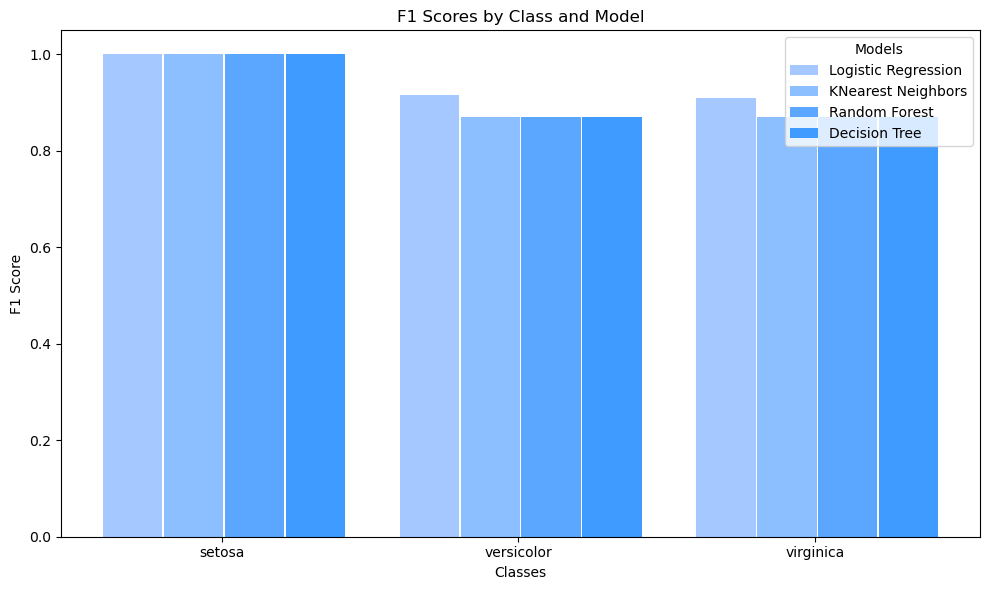

In [240]:
# Set up bar width and positions
bar_width = 0.2
index = np.arange(len(classes))

# Set up figure
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for the bars
colors = ['#A4C8FF', '#8BBFFF', '#5BA6FF', '#3F9BFF']

# Plotting bars for each model with a gap between them
for i, f1 in enumerate(f1_scores):
    ax.bar(index + i * (bar_width + 0.005), f1, bar_width, label=models[i], color=colors[i])

# Formatting the plot
ax.set_xlabel('Classes')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores by Class and Model')
ax.set_xticks(index + bar_width * (len(f1_scores) - 1) / 2)
ax.set_xticklabels(classes)
ax.legend(title="Models")

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()